<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

**Цель исследования**

построить модель со значением F1-меры не менее 0.59 для осуществления прогноза: уйдёт ли клиент из «Бета-Банка» в ближайшее время или нет; проверить F1-меру на тестовой выборке. 

**Описание данных:**

для проведения анализа представлены исторические данные о поведении клиентов «Бета-Банка» и расторжении договоров с банком (*файл /datasets/Churn.csv*). Ниже приведен перечень представленных даных: 

- RowNumber (индекс строки в данных);
- CustomerId (уникальный идентификатор клиента);
- Surname (фамилия);
- CreditScore (кредитный рейтинг);
- Geography (страна проживания);
- Gender (пол);
- Age (возраст);
- Tenure (сколько лет человек является клиентом банка);
- Balance (баланс на счёте);
- NumOfProducts (количество продуктов банка, используемых клиентом);
- HasCrCard (наличие кредитной карты);
- IsActiveMember (активность клиента);
- EstimatedSalary (предполагаемая зарплата);
- Exited (факт ухода клиента).


**План работы:**

1. открыть файл с данными и изучить общую информацию;
2. выполнить предобработку данных;
3. исследовать баланс классов и обучить модель без учёта дисбаланса;
4. улучшить качество модели, учитывая дисбаланс классов;
5. провести финальное тестирование;
6. сформулировать общий вывод.

## Подготовка данных

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
sns.set()
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    confusion_matrix, 
    f1_score,
    roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

In [2]:
# загружаем данные из файла в датафрейм
data = pd.read_csv('/datasets/Churn.csv')
# выводим основную информацию о датафреймах с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Как мы видим, в датафрейме 14 столбцов и 10 000 строк. Значения **8 столбцов относятся к целочисленному типу. Это:**

- RowNumber (индекс строки в данных);
- CustomerId (уникальный идентификатор клиента);
- CreditScore (кредитный рейтинг);
- Age (возраст);
- NumOfProducts (количество продуктов банка, используемых клиентом);
- HasCrCard (наличие кредитной карты);
- IsActiveMember (активность клиента);
- Exited (факт ухода клиента).

Значения **3 столбцов относятся к вещественному типу. Это:**

- Tenure (сколько лет человек является клиентом банка);
- Balance (баланс на счёте);
- EstimatedSalary (предполагаемая зарплата).

Значения **3 столбцов относятся к строковому типу. Это:**

- Surname (фамилия);
- Geography (страна проживания);
- Gender (пол).

Таким образом, в датафрейме используются корректные типы данных, менять их мы не будем. При этом названия столбцов стоит привести в соответствие со "змеиным регистром". 

In [3]:
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# приведем названия стобцов датафрейма к змеиному регистру
#data.columns = data.columns.str.lower()
#data = data.rename(columns={'rownumber': 'row_number', 'customerid': 'customer_id', 'creditscore': 'credit_score',\
#'numofproducts':'num_of_products', 'hascrcard':'has_cr_card', 'isactivemember':'is_active_member',\
                            #'isactivemember':'is_active_member', 'estimatedsalary':'estimated_salary'})
#data.info()

Таким образом, все названия столбцов нашего датафрейма соответствуют "змеиному регистру". Теперь выведем первые 20 строчек датафрейма на экран.

In [5]:
data.head(20)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


В выведенных на экран строчках датафрейма пропуски отсутствуют. Очевидных противоречий либо маловероятных значений в представленном фрагменте также не наблюдается. Теперь посмотрим распределение по каждому из столбцов датафрейма и проведем проверку на наличие пропусков и дубликатов.

In [6]:
# запрашиваем распределение по каждому из столбцов датафрейма
data.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_number,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
num_of_products,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


Видим, что средний возраст клиентов банка составляет почти 39 лет при медиане 37. Наименьший возраст клиента - 18 лет, а наиболее старшему из клиентов 92 года. В среднем жизненный цикл клиента банка составляет 5 лет. Максимальное количество продуктов, которое использует 1 клиент, - 4 при медиане 1. Наличие у клиента кредитной карты, а также информация о том, является ли клиент активным или неактивным и факт ухода клиента обозначены заначениями 0 или 1. Таким образом, явных противоречий, либо маловероятных значений в представленном выше распределении не наблюдается. Теперь проверим датафрейм на наличие пропусков.

In [8]:
# проверим количество пропусков в % 
pd.DataFrame(round(data.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
tenure,9.000000
row_number,0.000000
customer_id,0.000000
surname,0.000000
credit_score,0.000000
geography,0.000000
gender,0.000000
age,0.000000
balance,0.000000
num_of_products,0.000000


In [9]:
data['tenure'].isna().sum()

909

Видим, что пропуски имеются только в одном столбце датафрейма - tenure (сколько лет человек является клиентом банка). Их количество 909, что составляет 9% от общего количества данных в столбце. Наличие этих пропусков может быть связано как с ошибкой при записи данных, так и с "человеческим фактором" (небрежным заполнением клиентской базы).

Учитывая, что:

- доля пропущенных значений невелика;
- восстановить информацию мы не можем;
- замена пропущенных значений на 0 может повлиять на точность нашего исследования;
- оставление пропусков "как есть" создаст препятствие для обучения модели;
- удаление пропущенных строк приведет к потере данных в других столбцах;
- данные столбца tenure не являются целевым признаком для нашего исследования,

проведем замену пропусков на случайные значения. Как видно из представленного выше распределения по столбцам датафрейма, данные в столбце tenure принимают значение в диапазоне от 0 до 10. Поэтому для заполнения используем случайные значения именно из этого диапазона.

In [10]:
data['tenure'] = data['tenure'].mask(data['tenure'].isna(), np.random.uniform(0, 10, size=len(data))).astype('float64')
data['tenure'].isna().sum()

0

In [11]:
data['tenure'].describe()

count    10000.000000
mean         4.996241
std          2.898855
min          0.000000
25%          2.190257
50%          5.000000
75%          7.372140
max         10.000000
Name: tenure, dtype: float64

Все пропуски заполнены. Как видим, заполнение пропусков случайными значениями не оказало существенного влияния на распределение:
- среднее до заполнения пропусков было 4.997690, стало 4.996241;
- медиана осталась прежней: 5.000000;
- стандартное отклонение было 2.894723, стало 2.898855

In [12]:
# проведем проверку на наличие дубликатов
data.duplicated().sum()

0

Таким образом, явные дубликаты в представленном датафрейме отсутствуют. При этом, учитывая, что все значения столбцов нашего датафрейма (за исключением информации о фамилии, стране проживания и поле клиента) являются числовыми, осуществлять поиск неявных дубликатов не имеет смысла. На этом мы закончили этап подготовки данных и можем перейти к следующему шагу. 

Таким образом, на данном этапе мы выяснили следующее:

- датафрейм состоит из 14 столбцов и 10 000 строк, значения 8 столбцов относятся к целочисленному типу, 3 - к вещественному и 3 - к строковому.
- Использованные типы данных корректны.
- Средний возраст клиентов банка составляет почти 39 лет при медиане 37. Наименьший возраст клиента - 18 лет, а наиболее старшему из клиентов 92 года.
- В среднем жизненный цикл клиента банка составляет 5 лет.
- Максимальное количество продуктов, которое использует 1 клиент, - 4 при медиане 1. 
- Наличие у клиента кредитной карты, а также информация о том, является ли клиент активным или неактивным и факт ухода клиента обозначены заначениями 0 или 1. 
- Явные противоречия в данных, либо маловероятные значения отсутствуют.
- Пропуски имелись только в одном столбце датафрейма - tenure (сколько лет человек является клиентом банка). Их количество было 909, что составляло 9% от общего количества данных в столбце. Мы их обработали (заменили случайными значениями).
- Явные и неявные дубликаты отсутствуют.

Кроме того, названия всех столбцов датафрейма привели к "змеиному регистру".

Теперь данные готовы для проведения исследования и мы можем приступить к исследованию баланса классов и обучению нашей модели.


## Исследование задачи

Учитывая, что для индентификации пользователя у нас имеются числовые значения в столбце customer_id, информация о фамилиях клиентов банка нам для дальнейшего исследования не требуется. Поэтому мы удалим столбец surname

In [13]:
data = data.drop(['surname'], axis = 1)

Столбец row_number (индекс строки в данных) дублирует информацию стандартного датафрейма и не несет ценности для обучения модели. Его мы также удалим.

In [14]:
data = data.drop(['row_number'], axis = 1)

In [15]:
data = data.drop(['customer_id'], axis = 1)

С помощью техники OHE подготовим данные из столбцов gender и geography. Используем параметр drop_first=True, чтобы избежать дамми-ловушки.

In [16]:
print(data['gender'].value_counts())
print()
print(data['geography'].value_counts())

Male      5457
Female    4543
Name: gender, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64


In [17]:
data_ohe = pd.get_dummies(data, columns = ['gender', 'geography'], drop_first=True)
data_ohe.head(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8.0,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2.0,134603.88,1,1,1,71725.73,0,1,0,0


Разделим исходные данные на обучающую, валидационную и тестовую выборки. При деоении на три части размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1. Для этого используем функцию train_test_split

In [18]:
# создаем обучающую выборку - data_train
data_train, data_other = train_test_split(data_ohe, test_size=0.4, random_state=12345)
# создаем тестовую и валидационную выборки - data_test, data_valid (на них будет приходиться по 20%)
data_test, data_valid = train_test_split(data_other, test_size=0.5, random_state=12345)

In [19]:
# вывелем на экран размеры выборок
print('Размер обучающей выборки составляет:', data_train.shape)
print('Размер тестовой выборки составляет:', data_test.shape)
print('Размер валидационной выборки составляет:', data_valid.shape)

Размер обучающей выборки составляет: (6000, 12)
Размер тестовой выборки составляет: (2000, 12)
Размер валидационной выборки составляет: (2000, 12)


In [20]:
# выведем на экран первые 5 строк для каждой из выборок
display(data_train.head())
display(data_test.head())
display(data_valid.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,0,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,0,1,1,0
1247,512,24,6.0,0.00,2,1,0,37654.31,0,1,0,0
3716,665,27,2.0,147435.96,1,0,0,187508.06,0,0,1,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
8532,585,35,2.0,0.00,2,1,0,98621.04,1,0,0,0
5799,625,45,3.0,0.00,1,1,1,184474.15,1,0,0,0
5511,667,32,0.0,103846.65,1,1,0,20560.69,0,1,1,0
7365,568,36,10.0,153610.61,1,1,1,54083.80,1,0,0,1
7367,606,42,10.0,0.00,2,1,0,177938.52,0,1,0,1


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
7041,438,38,2.0,0.00,2,1,0,136859.55,0,1,0,0
5709,644,39,9.0,0.00,1,1,0,3740.93,0,0,0,0
7117,564,31,5.0,121461.87,1,1,1,20432.09,1,1,0,1
7775,628,40,10.0,0.00,2,1,0,103832.58,0,1,0,1
8735,728,30,10.0,114835.43,1,0,1,37662.49,0,1,0,0


In [21]:
# извлекаем признаки - features и целевой признак - target
# для обучающей выборки
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']
# для тестовой выборки
features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']
# для валидационной выборки
features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']

In [22]:
# выведем на экран первые 5 строк для обучающей выборки
display(features_train.head(5))
display(target_train.head(5))

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_Male,geography_Germany,geography_Spain
7479,567,35,8.0,153137.74,1,1,0,88659.07,1,0,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,1,0
1247,512,24,6.0,0.00,2,1,0,37654.31,1,0,0
3716,665,27,2.0,147435.96,1,0,0,187508.06,0,1,0


7479    0
3411    0
6027    0
1247    0
3716    0
Name: exited, dtype: int64

In [23]:
# проводим масштабирование (стандартизацию данных)
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
scaler.fit(features_valid[numeric]) 
features_valid[numeric] = scaler.transform(features_valid[numeric])
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_Male,geography_Germany,geography_Spain
7479,-0.886751,-0.373192,1.032703,1.232271,-0.891560,1,0,-0.187705,1,0,1
3411,0.608663,-0.183385,1.032703,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.699005,1.027098,0.830152,0,1,1.503095,1,1,0
1247,-1.457915,-1.417129,0.340020,-1.233163,0.830152,1,0,-1.071061,1,0,0
3716,0.130961,-1.132419,-1.045346,1.140475,-0.891560,0,0,1.524268,0,1,0


На этом шаге мы:

- удалили столбцы surname, customer_id и row_number (как не несущие ценности для обучения модели);
- с помощью техники OHE подготовили данные из столбцов gender и geography;
- разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1;
- извлекли признаки (features) и целевой признак (target) для каждой из указанных выше выборок;
- провели стандартизацию данных.

Теперь приступим к исследованию баланса классов и обучению модели без учёта дисбаланса.

In [24]:
print(data['exited'].value_counts())
print()
print(target_train.value_counts(normalize = 1))
print()
print(target_valid.value_counts(normalize = 1))

0    7963
1    2037
Name: exited, dtype: int64

0    0.800667
1    0.199333
Name: exited, dtype: float64

0    0.7885
1    0.2115
Name: exited, dtype: float64


Таким образом, у обучающией и валидационной выборок **наблюдается заметный дисбаланс класов (примерно 80/20)**, поэтому можно ожидать, что результаты предсказаний модели будут сильно склоняться к одному варианту ответов.

Теперь изучим модели без учета дисбаланса. Выберем лучшие гиперпараметры для моделей "Дерево решений" (DecisionTreeClassifier) и "Случайный лес" (RandomForestClassifier) и сравним результаты.

In [25]:
# сравниваем модели с разной глубиной дерева
best_model = None
best_f1 = 0
best_auc_roc = 0
best_depth = 0
for depth in range(1,40):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1.fit(features_train, target_train)
    predictions = model_1.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities = model_1.predict_proba(features_valid)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one)
    if f1 > best_f1 and auc_roc > best_auc_roc:
        best_model = model_1
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('F1-мера лучшей модели: ', best_f1)
print('AUC-ROC лучшей модели: ', best_auc_roc)
print('Глубина дерева лучшей модели: ', best_depth)   

F1-мера лучшей модели:  0.4986301369863014
AUC-ROC лучшей модели:  0.7280154586243442
Глубина дерева лучшей модели:  2


In [26]:
# строим матрицу ошибок
confusion_matrix(target_valid, predictions)

array([[937, 640],
       [210, 213]])

Таким образом, лучшее результаты показало Дерево решений с глубиной 2. При этом стоит отметить, что полученное значение AUC-ROC превышает AUC-ROC случайной модели (для нее это значение равно 0.5), но среднее гармоническое полноты и точности - F1-мера имеет довольно низкое значение. 
Если мы посмотрим на матрицу ошибок, увидим, что велико количество ложноположительных и ложноотрицательных ответов: 640 и 210 соответственно.

Теперь выберем лучшие гиперпараметры для модели "Случайный лес".

In [27]:
# рассмотрим гиперпараметр n_estimators (т.е. количество деревьев)
#best_model_2 = None
#best_f1_2 = 0
#best_auc_roc_2 = 0
#best_estim = 0
#for estim in range(10,300,10):
    #model_2 = RandomForestClassifier(random_state=12345,n_estimators=estim)
    #model_2.fit(features_train, target_train)
    #predictions_2 = model_2.predict(features_valid) 
    #f1_2 = f1_score(target_valid, predictions_2)
    #probabilities = model_2.predict_proba(features_valid)
    #probabilities_one = probabilities[:, 1]
    #auc_roc_2 = roc_auc_score(target_valid, probabilities_one)
    #if f1_2 > best_f1_2 and auc_roc_2 > best_auc_roc_2:
        #best_model_2 = model_2
        #best_f1_2 = f1_2
        #best_auc_roc_2 = auc_roc_2
        #best_estim = estim
#print('F1-мера лучшей модели: ', best_f1_2)
#print('AUC-ROC лучшей модели: ', best_auc_roc_2)
#print('Количество деревьев лучшей модели: ', best_estim)   

In [28]:
#best_model_2 = None
#best_f1_2 = 0
#best_auc_roc_2 = 0
#best_depth_2 = 0
#for depth_2 in range(1,40):
    #model_2 = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=depth_2)
    #model_2.fit(features_train, target_train)
    #predictions_2 = model_2.predict(features_valid) 
    #f1_2 = f1_score(target_valid, predictions_2)
    #probabilities = model_2.predict_proba(features_valid)
    #probabilities_one = probabilities[:, 1]
    #auc_roc_2 = roc_auc_score(target_valid, probabilities_one)
    #if f1_2 > best_f1_2 and auc_roc_2 > best_auc_roc_2:
        #best_model_2 = model_2
        #best_f1_2 = f1_2
        #best_auc_roc_2 = auc_roc_2
        #best_depth_2 = depth_2
#print('F1-мера лучшей модели: ', best_f1_2)
#print('AUC-ROC лучшей модели: ', best_auc_roc_2)
#print('Глубина деревьев лучшей модели: ', best_depth_2)

In [29]:
best_model_2 = None
best_f1_2 = 0
best_auc_roc_2 = 0
best_estim = 0
best_depth_2 = 0
for estim in range(10, 250, 10):
    for depth_2 in range(1, 25, 2):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth_2)
        model_2.fit(features_train, target_train)
        predictions_2 = model_2.predict(features_valid) 
        f1_2 = f1_score(target_valid, predictions_2)
        probabilities = model_2.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        auc_roc_2 = roc_auc_score(target_valid, probabilities_one)
        if f1_2 > best_f1_2 and auc_roc_2 > best_auc_roc_2:
            best_model_2 = model_2
            best_f1_2 = f1_2
            best_auc_roc_2 = auc_roc_2
            best_estim = estim
            best_depth_2 = depth_2
print('F1-мера лучшей модели: ', best_f1_2)
print('AUC-ROC лучшей модели: ', best_auc_roc_2)
print('Количество деревьев лучшей модели: ', best_estim)
print('Глубина деревьев лучшей модели: ', best_depth_2)

F1-мера лучшей модели:  0.5149136577708007
AUC-ROC лучшей модели:  0.8544412813628535
Количество деревьев лучшей модели:  230
Глубина деревьев лучшей модели:  9


In [30]:
confusion_matrix(target_valid, predictions_2)

array([[1516,   61],
       [ 240,  183]])

Таким образом, лучшие характеристики к модели "Случайный лес" со значениями гиперпараметров n_estimators = 230 и  max_depth = 9: 
- F1-мера: 0.5149136577708007 (у "Дерева решений" - 0.4986301369863014);
- AUC-ROC: 0.8544412813628535 (у "Дерева решений" - 0.7280154586243442).

У этой модели "Случайный лес" существенно меньше ложноположительных ответов, чем у "Дерева решений": 61 против 640. При этом наша лучшая модель пока имеет довольно низкое значение F1-меры, что связано с дисбалансом классов. Это отражает и большое количество ложноотрицательных ответов модели: 240.  

## Борьба с дисбалансом

Для решения проблемы дисбаланса используем и сравним результаты трех методов: взвешивание классов, увеличение выборки, уменьшение выборки. Лучший метод определим с помощью F1-меры.

**Использование взвешивания классов**

In [31]:
#model_2 = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=11, class_weight='balanced')
#model_2.fit(features_train, target_train)
#predictions_2 = model_2.predict(features_valid) 
#probabilities = model_2.predict_proba(features_valid)
#probabilities_one = probabilities[:, 1]
#print('F1-мера: ', f1_score(target_valid, predictions_2))
#print('AUC-ROC: ', roc_auc_score(target_valid, probabilities_one))

<br/>
<div class="alert alert-info">
Исправил, смотри ниже
</div>


In [32]:
# подбираем оптимальное значение max_depth для "Дерева решений" с использованием взвешивания классов 
best_model = None
best_f1 = 0
best_auc_roc = 0
best_depth = 0
for depth in range(1,40):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_1.fit(features_train, target_train)
    predictions = model_1.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities = model_1.predict_proba(features_valid)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one)
    if f1 > best_f1 and auc_roc > best_auc_roc:
        best_model = model_1
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('F1-мера лучшей модели: ', best_f1)
print('AUC-ROC лучшей модели: ', best_auc_roc)
print('Глубина дерева лучшей модели: ', best_depth)

F1-мера лучшей модели:  0.5809128630705395
AUC-ROC лучшей модели:  0.8260537484015945
Глубина дерева лучшей модели:  5


In [34]:
# подбираем оптимальные значения max_depth и n_estimators=estim для "Случайного леса" с использованием взвешивания классов
best_model_2 = None
best_f1_2 = 0
best_auc_roc_2 = 0
best_estim = 0
best_depth_2 = 0
for estim in range(10, 250, 10):
    for depth_2 in range(1, 25, 2):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth_2, class_weight='balanced')
        model_2.fit(features_train, target_train)
        predictions_2 = model_2.predict(features_valid) 
        f1_2 = f1_score(target_valid, predictions_2)
        probabilities = model_2.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        auc_roc_2 = roc_auc_score(target_valid, probabilities_one)
        if f1_2 > best_f1_2 and auc_roc_2 > best_auc_roc_2:
            best_model_2 = model_2
            best_f1_2 = f1_2
            best_auc_roc_2 = auc_roc_2
            best_estim = estim
            best_depth_2 = depth_2
print('F1-мера лучшей модели: ', best_f1_2)
print('AUC-ROC лучшей модели: ', best_auc_roc_2)
print('Количество деревьев лучшей модели: ', best_estim)
print('Глубина деревьев лучшей модели: ', best_depth_2)

F1-мера лучшей модели:  0.6127946127946129
AUC-ROC лучшей модели:  0.8569087848220054
Количество деревьев лучшей модели:  100
Глубина деревьев лучшей модели:  9


Видим, что использования взвешивания классов существенно улучшило характеристики как "Дерева решений", так и "Случайного леса", но у "Случайного леса" остались более высокие значения метрик.

**Увеличение выборки**

In [35]:
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled   

In [36]:
# подбираем оптимальное значение max_depth для "Дерева решений"
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
best_model = None
best_f1 = 0
best_auc_roc = 0
best_depth = 0
for depth in range(1,40):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1.fit(features_upsampled, target_upsampled)
    predictions = model_1.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities = model_1.predict_proba(features_valid)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one)
    if f1 > best_f1 and auc_roc > best_auc_roc:
        best_model = model_1
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('F1-мера лучшей модели: ', best_f1)
print('AUC-ROC лучшей модели: ', best_auc_roc)
print('Глубина дерева лучшей модели: ', best_depth)   

F1-мера лучшей модели:  0.5809128630705395
AUC-ROC лучшей модели:  0.8260537484015945
Глубина дерева лучшей модели:  5


In [37]:
# подбираем оптимальные значения max_depth и n_estimators=estim для "Случайного леса"
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
best_model_2 = None
best_f1_2 = 0
best_auc_roc_2 = 0
best_estim = 0
best_depth_2 = 0
for estim in range(10, 250, 10):
    for depth_2 in range(1, 25, 2):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth_2)
        model_2.fit(features_upsampled, target_upsampled)
        predictions_2 = model_2.predict(features_valid) 
        f1_2 = f1_score(target_valid, predictions_2)
        probabilities = model_2.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        auc_roc_2 = roc_auc_score(target_valid, probabilities_one)
        if f1_2 > best_f1_2 and auc_roc_2 > best_auc_roc_2:
            best_model_2 = model_2
            best_f1_2 = f1_2
            best_auc_roc_2 = auc_roc_2
            best_estim = estim
            best_depth_2 = depth_2
print('F1-мера лучшей модели: ', best_f1_2)
print('AUC-ROC лучшей модели: ', best_auc_roc_2)
print('Количество деревьев лучшей модели: ', best_estim)
print('Глубина деревьев лучшей модели: ', best_depth_2)

F1-мера лучшей модели:  0.6155555555555555
AUC-ROC лучшей модели:  0.8550334222294178
Количество деревьев лучшей модели:  110
Глубина деревьев лучшей модели:  11


По итогам сравнения наших моделей после взвешивания классов и увеличения выборки лучшим значением F1-меры (0.6155555555555555) обладает полученный методом увеличения выборки "Случайный лес" с количеством деревьев 110 и глубиной деревьев 11. Теперь проведем уменьшение выборки и сравним результаты. 

<div class="alert alert-block alert-danger">
<h2> <s>Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
По организации кода: важно апсемплинг реализовать в отдельной ячейке. Затем обучение модели - в отдельной. 
    
***
 
Здесь ты дублируешь редкий класс в 10 раз. У нас же, как мы увидели раньше, дисбаланс составляет 1:4. То есть, теперь окажется, что бывший редкий класс будет в 2,5 раза чаще встречаться.
    
Правильно будет довести баланс классов до 1:1, то есть, умножить на 4 (подав такой коэффициент в функцию).

</div> 


<br/>
<div class="alert alert-info">
Исправил, смотри выше
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`

В некоторых случаях качество может при применении SMOTE как улучшаться, так и ухудшаться в пределах статистической погрешности. Алгоритм не дублирует строки, а создает новые с помощью метода ближайших соседей.

***
    
Если код выдаст ошибку, нужно перезагрузить ядро юпитера: Kernel - Restart на панели задач.
 
    
</div>


<br/>
<div class="alert alert-info">
Я не понял этот простой метод...) Где мы указываем во сколько раз изменять размер и класса что такое "_enc"?
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 `features_train_enc` - просто скопировал. Это наши «features_train». Подаем тренировочную выборку на вход, на выходе получаем апсемплированную. Здесь коэффициент считать не нужно, функция все делает за нас. В документации можно посмотреть, если хочется дать свой коэффициент, там есть такой параметр. Но вообще по умолчанию оптимально будет сделать баланс классов 1:1. 
</div>

**Уменьшение выборки**

In [38]:
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [39]:
# подбираем оптимальное значение max_depth для "Дерева решений"
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
best_model = None
best_f1 = 0
best_auc_roc = 0
best_depth = 0
for depth in range(1,40):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1.fit(features_downsampled, target_downsampled)
    predictions = model_1.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities = model_1.predict_proba(features_valid)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one)
    if f1 > best_f1 and auc_roc > best_auc_roc:
        best_model = model_1
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
print('F1-мера лучшей модели: ', best_f1)
print('AUC-ROC лучшей модели: ', best_auc_roc)
print('Глубина дерева лучшей модели: ', best_depth)   

F1-мера лучшей модели:  0.6093264248704664
AUC-ROC лучшей модели:  0.8317098179953857
Глубина дерева лучшей модели:  5


In [40]:
# подбираем оптимальные значения max_depth и n_estimators=estim для "Случайного леса"
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
best_model_2 = None
best_f1_2 = 0
best_auc_roc_2 = 0
best_estim = 0
best_depth_2 = 0
for estim in range(10, 250, 10):
    for depth_2 in range(1, 25, 2):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth_2)
        model_2.fit(features_downsampled, target_downsampled)
        predictions_2 = model_2.predict(features_valid) 
        f1_2 = f1_score(target_valid, predictions_2)
        probabilities = model_2.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        auc_roc_2 = roc_auc_score(target_valid, probabilities_one)
        if f1_2 > best_f1_2 and auc_roc_2 > best_auc_roc_2:
            best_model_2 = model_2
            best_f1_2 = f1_2
            best_auc_roc_2 = auc_roc_2
            best_estim = estim
            best_depth_2 = depth_2
print('F1-мера лучшей модели: ', best_f1_2)
print('AUC-ROC лучшей модели: ', best_auc_roc_2)
print('Количество деревьев лучшей модели: ', best_estim)
print('Глубина деревьев лучшей модели: ', best_depth_2)

F1-мера лучшей модели:  0.5944444444444444
AUC-ROC лучшей модели:  0.8481046245452132
Количество деревьев лучшей модели:  240
Глубина деревьев лучшей модели:  11


Таким образом, по итогам сравнения результатов примерения 3-х методов борьбы с дисбалансом и подбора оптимальных гиперпараметров моделей мы получили модель с наилучшими характеристиками:

- F1-мера: 0.6155555555555555;
- AUC-ROC: 0.8550334222294178.

Это модель "Случайный лес" с количеством деревьев 110 и глубиной деревьев 11 при применении метода "увеличение выборки". Теперь испытаем нашу модель на тестовой выборке. 

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Даунсемплинг также нужно довести до баланса классов 1:1. У нас дисбаланс 1:4, значит, частый класс умножаем на четверть.

</div>

<br/>
<div class="alert alert-info">
Исправил, смотри выше
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Необходимо со всеми методами борьбы с дисбалансом классов обучить все ранее выбранные модели. В каждом случае в деревянных моделях нужно заново подбирать гиперпараметры. Одни гиперпараметры в другой ситуаици уже не будет оптимальными.

</div>


<br/>
<div class="alert alert-info">
Исправил, смотри выше
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
Здесь важно указать гиперпараметры и метод борьбы с дисбалансом, которые мы используем для выбранной модели в тестировании.

</div>


<br/>
<div class="alert alert-info">
Исправил, смотри выше
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично по всем пунктам.
</div>
 

## Тестирование модели

Теперь проверим значения F1-меры и AUC-ROC для нашей модели на тестовой выборке.

In [41]:
model = RandomForestClassifier(random_state=12345, n_estimators=110, max_depth=11)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test) 
probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]
print('F1-мера: ', f1_score(target_test, predictions))
print('AUC-ROC: ', roc_auc_score(target_test, probabilities_one))

F1-мера:  0.6220204313280363
AUC-ROC:  0.8470774684095597


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. По коду тестирования все верно, используем ранее подобранные гипепараметры и модель, по качеству все неплохо.
</div> 
   

В условиях проекта указано, что нужно довести метрику F1-мера до значения 0.59 на тестовой выборке. Наш результат: 0.62 (при AUC-ROC: 0.85). Соответственно, данное условие успешно выполнено.

Построим ROC-кривую для графического отображения сравнения нашей модели со случайной (ROC-кривая случайной модели выглядит как прямая).

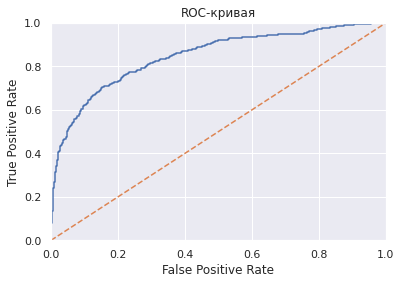

In [42]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Text(0.5, 0, 'Вес признака')

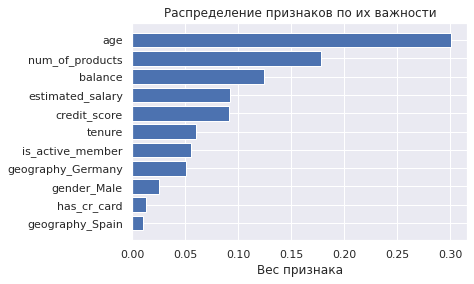

In [43]:
#выведем на экран распределение признаков по их важности
features=features_test.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Распределение признаков по их важности')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Вес признака')

Из графика мы видим, что наиболее важны следующие признаки: возраст клиента, количество используемых им продуктов банка и баланс на счете.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Полезный график!
</div> 
   

## Общий вывод:

Целью нашего исследования было построить модель со значением F1-меры не менее 0.59 для осуществления прогноза: уйдёт ли клиент из «Бета-Банка» в ближайшее время или нет, а также проверить F1-меру на тестовой выборке. Для проведения анализа были представлены исторические данные о поведении клиентов «Бета-Банка» и расторжении договоров с банком (файл /datasets/Churn.csv).

Анализируемый датафрейм состоит из 14 столбцов и 10 000 строк, значения 8 столбцов относятся к целочисленному типу, 3 - к вещественному и 3 - к строковому. Использованные типы данных корректны. Явные и неявные дубликаты отсутствуют. Пропуски имелись только в одном столбце датафрейма - tenure (сколько лет человек является клиентом банка). Их количество было 909, что составляло 9% от общего количества данных в столбце. Мы их обработали (заменили случайными значениями). Кроме того, названия всех столбцов датафрейма привели к "змеиному регистру".

При изучении данных установлено:

- средний возраст клиентов банка составляет почти 39 лет при медиане 37. Наименьший возраст клиента - 18 лет, а наиболее старшему из клиентов 92 года.
- В среднем жизненный цикл клиента банка составляет 5 лет.
- Максимальное количество продуктов, которое использует 1 клиент, - 4 при медиане 1.
- Наличие у клиента кредитной карты, а также информация о том, является ли клиент активным или неактивным и факт ухода клиента обозначены заначениями 0 или 1.
- Явные противоречия в данных, либо маловероятные значения отсутствуют.

В ходе дальнейшего исследования мы:

- удалили столбцы surname, customer_id и row_number (как не несущие ценности для обучения модели);
- с помощью техники OHE подготовили данные из столбцов gender и geography;
- разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1;
- извлекли признаки (features) и целевой признак (target) для каждой из указанных выше выборок;
- провели стандартизацию данных.

Сравнив разные типы моделей и подобрав оптимальное значение гиперпараметров, мы установили, что лучшие характеристики у модели "Случайный лес" со значениями гиперпараметров n_estimators = 230 и max_depth = 9:

- F1-мера: 0.5149136577708007 (у "Дерева решений" - 0.4986301369863014);
- AUC-ROC: 0.8544412813628535 (у "Дерева решений" - 0.7280154586243442).

У этой модели существенно меньше ложноположительных ответов, чем у "Дерева решений": 61 против 640. При этом наша лучшая модель имела довольно низкое значение F1-меры, что связано с дисбалансом классов. Это отражало и большое количество ложноотрицательных ответов модели: 240.

Для улучшения характеристик модели мы использовали три метода для борьбы с дисбалансом: взвешивание классов, увеличение выборки, уменьшение выборки.

При сравнении полученных значений F1-меры мы установили, что наилучший результат был достигнут у модели "Случайный лес" с количеством деревьев 110 и глубиной деревьев 11 при применении метода "увеличение выборки":

- F1-мера: 0.6155555555555555;
- AUC-ROC: 0.8550334222294178.

Как видно, до исправления дисбаланса метрика F1 нашей модели была существенно ниже.

**Проверив значения F1-меры и AUC-ROC для нашей модели на тестовой выборке, мы получили следующий результат:**

- F1-мера: 0.6220204313280363;
- AUC-ROC: 0.8470774684095597.

**В условиях проекта указано, что нужно довести метрику F1-мера до значения 0.59 на тестовой выборке. Соответственно, данное условие успешно выполнено.**



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 


Я бы добавил сравнение по f1-мере с константной моделью, также можно посмотреть recall и прокомментировать, какую долю клиентов на отток модель верно детектирует.
***

Здесь в дамми-модели я бы предсказал везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.
    
`dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)`
    
Импорт: from sklearn.dummy import DummyClassifier

       
</div>


In [44]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)

0.3457402812241522

<br/>
<div class="alert alert-info">
Если так, то F1 для дамми-модели существенно ниже
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Ну и замечательно. У нас же чем выше метрика, тем лучше.
</div>
 


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо поправить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта. Выбор моделей, порядок исследования.
* Есть пояснения к шагам, код с высокой читаемостью. 
* Логичность решений.
* Хороший результат на тестовой выборке.
    
**На что стоит обратить внимание🤔**
    
* Необходимо удалить все лишние колонки.
* Гиперпараметры моделям подбираем в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса.
* Со всеми методами борьбы с дисбслансом важно исследовать все выбранные модели.
* У всех моделей важно измерить ROC_AUC по вероятностям классов.
* Апсемпилнг нужно довести до баланса классов (1:1, умножаем редкий класс на 4). Также и с даунсемплингом (только на 0.25).
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>




<br/>
<div class="alert alert-info">
Все замечания исправлены. Проект можно принимать)
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Не поспоришь. Принимаю :)
</div>
 

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за отличную доработку и за твои вопросы. 
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*